In [1]:
import pandas as pd
apps_with_duplicates = pd.read_csv('../input/android-app-market-on-google-play/datasets/apps.csv')
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ', len(apps))
print(apps.info())
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
618,748,Memorado - Brain Games,EDUCATION,4.4,56897,97.0,"1,000,000+",Free,0,Everyone,Education;Brain Games,"January 16, 2017",1.10.0,4.1 and up
6394,7441,Grand Gangsters 3D,GAME,4.2,401643,NaN,"10,000,000+",Free,0,Teen,Action,"July 18, 2018",Varies with device,Varies with device
6643,7702,CP Cloud,BUSINESS,NaN,3,5.4,100+,Free,0,Everyone,Business,"July 24, 2018",2.5,4.4 and up
3114,3906,Glow Hockey,GAME,4.1,1703479,NaN,"100,000,000+",Free,0,Everyone,Arcade,"July 22, 2018",1.3.8,4.1 and up
6040,7083,CA Mobile Authenticator,BUSINESS,NaN,9,6.9,"1,000+",Free,0,Everyone,Business,"December 15, 2016",1.0.0,4.2 and up


In [5]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for col in cols_to_clean:
     for char in chars_to_remove:
            apps[col] = apps[col].astype(str).str.replace(char, '')
     apps[col] = pd.to_numeric(apps[col]) 

Number of categories =  33


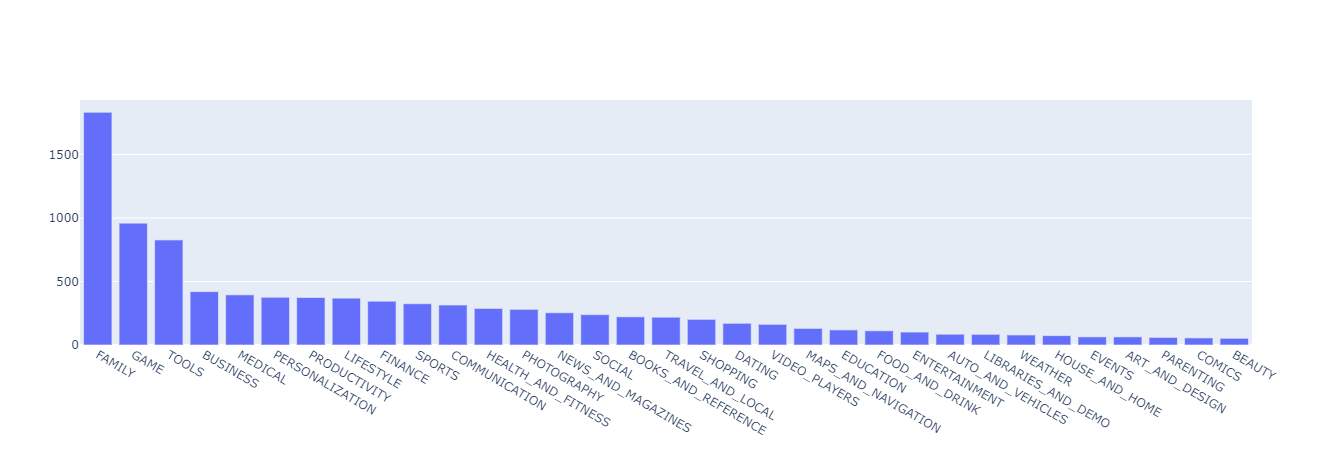

In [6]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values, 
)]

plotly.offline.iplot(data)

Average app rating =  4.173243045387994


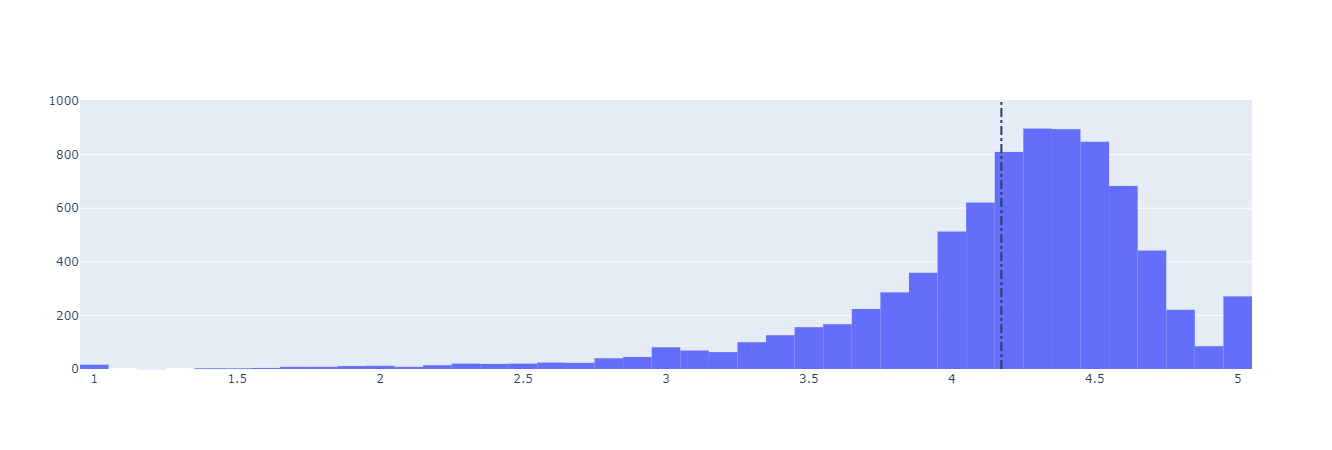

In [7]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)
data = [go.Histogram(
        x = apps['Rating']
)]
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

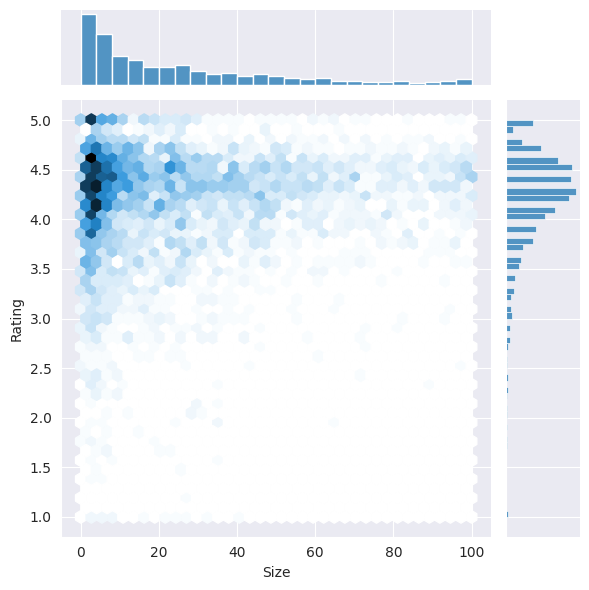

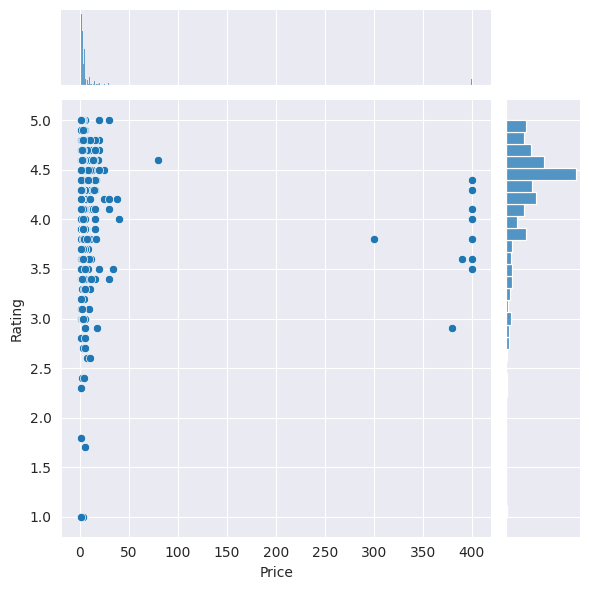

In [8]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


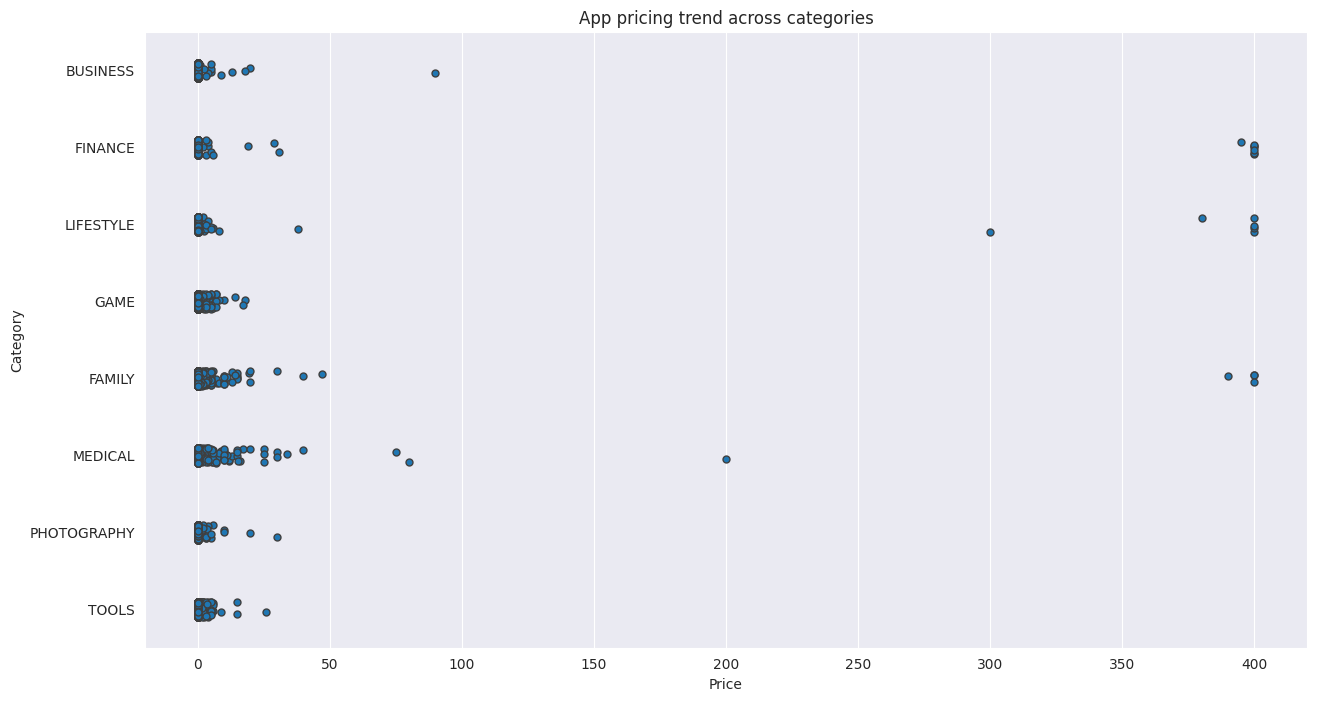

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

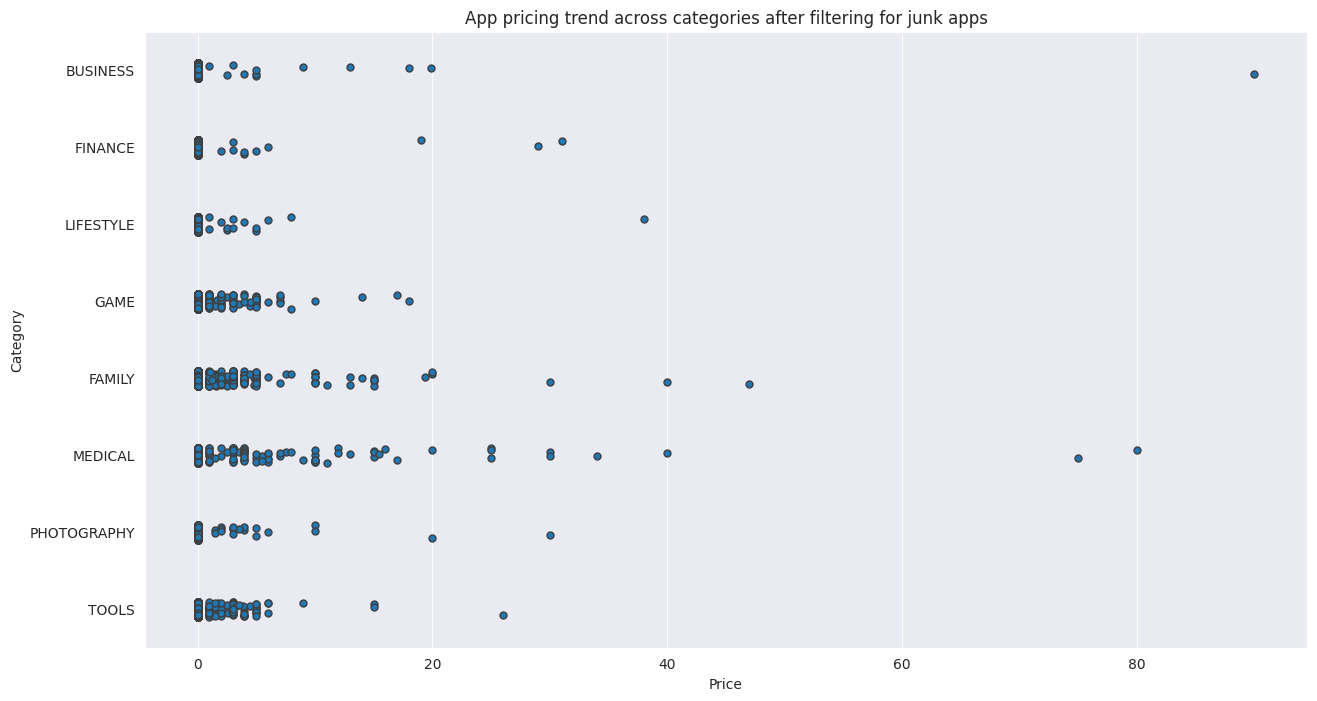

In [10]:
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x=apps_under_100['Price'], y=apps_under_100['Category'], data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

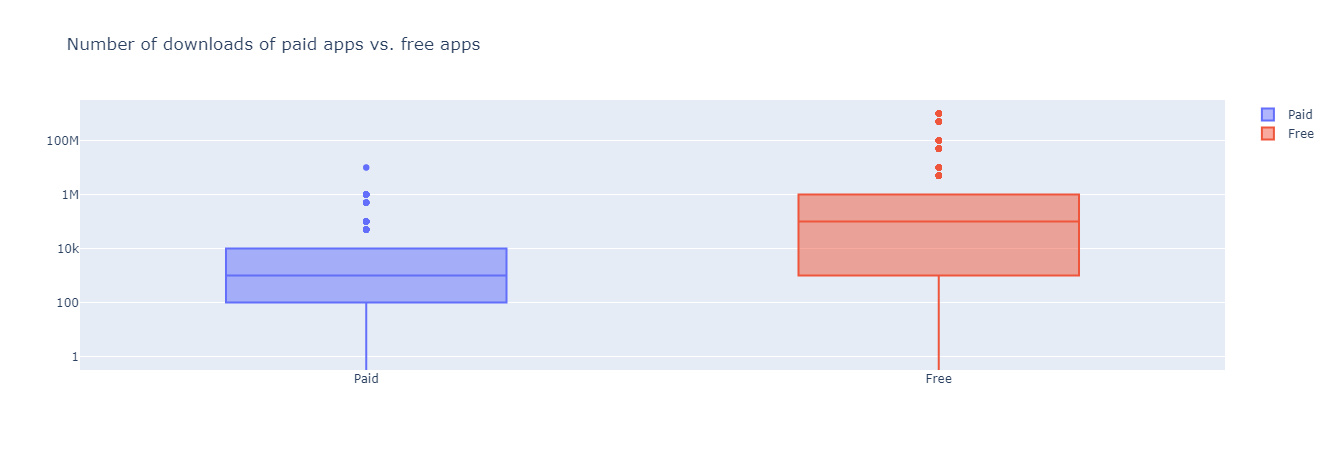

In [11]:
trace0 = go.Box(
    y=apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y=apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

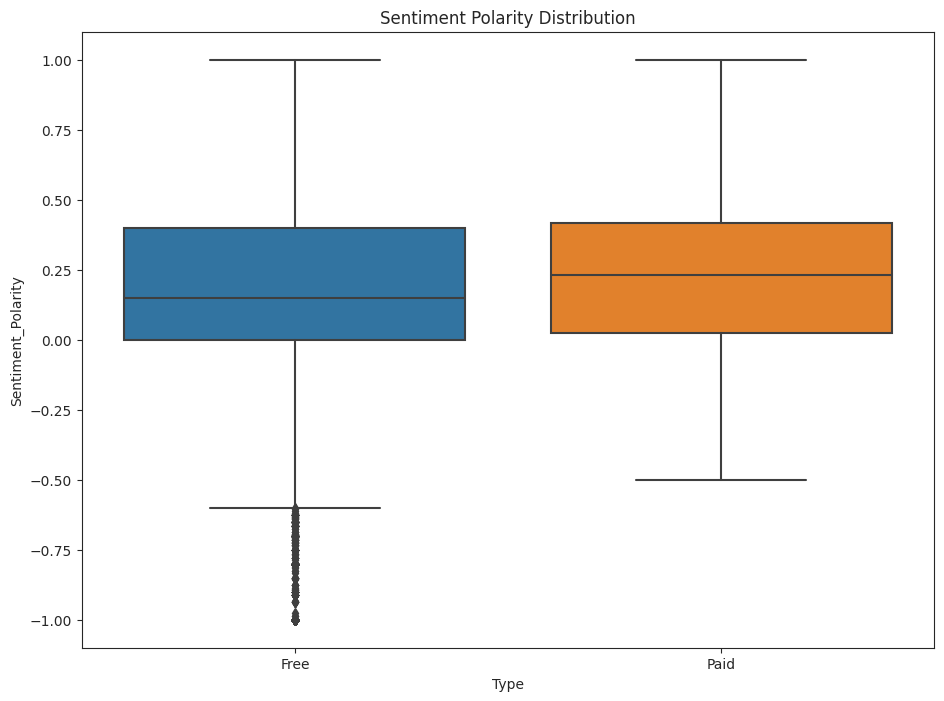

In [12]:
reviews_df = pd.read_csv("../input/android-app-market-on-google-play/datasets/user_reviews.csv")
merged_df = pd.merge(apps, reviews_df, on = 'App', how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')